# String Similarity - Levenshtein Distance
* Notebook by Adam Lang
* Date: 4/5/2024
* In this notebook we will review the Levenshtein Distance and its implementation in NLP.

# Levenshtein Distance
* The number of edits that will transform 1 string to another.
* These edits include:
  1. Insertion
  2. Deletion
  3. Substitution
* Example 1:
    * Scientist => Science
    * How many edits to transform?
        * t -> c
        * i -> e
        * s -> delete
        * t -> delete
        * **Levenshtein Distance = 4**

* Example 2:
    * Team => Text
    * How many edits to Transform?
        * a -> x
        * m -> t
        * **Levenshtein Distance = 2**

## More Complicated Levenshtein Calculations
* With longer and more complex strings it will be difficult to calculate the distance letter by letter.
* Thus, matrices are often used to do this.
* Matrix Steps
  1. mark/number each string (e.g. 1-4)
  2. Zero represents null string.
  3. Matrix calculation method
      * Take the min of surrounding cells + 1
      * Example:
          * To go from T to TE
          * calculation = min(0,1,2)+1

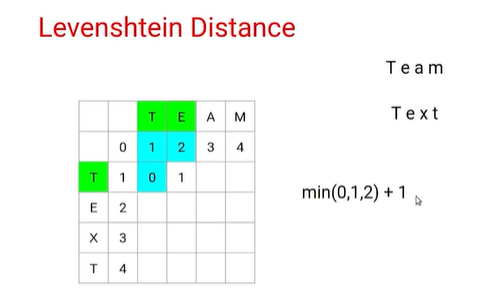



* The final distance calculation is the last cell of the matrix which is based on the surrounding cells as above, in this case it is 2.
* The diagonal of the matrix is what we use as our guide for letter substitution as seen below:

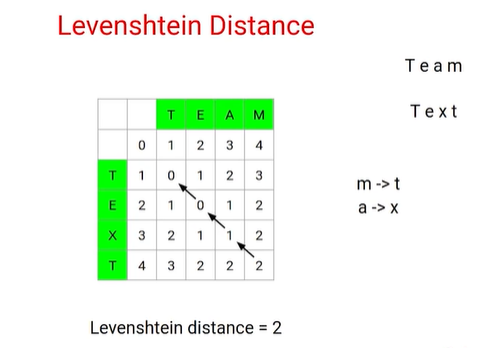



## Strings of different lengths
* Example: To vs. Too
* Note:
  * If the last value is the same, you take the minimum of the diagonal terms or the remaining surrounding terms + 1.
  * So T -> T = 0
  * T -> To = 1
  * Too -> T = 2
* We can see below we only need to delete the O to get from Too to To.

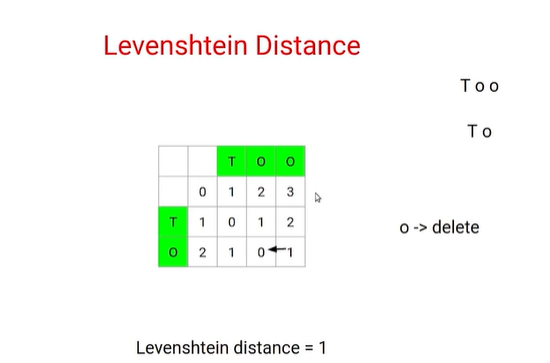

# Implementation of Levenshtein Distance

In [1]:
# import libraries
import numpy as np

In [2]:
# define 2 strings
seq1 = 'text'
seq2 = 'test'

In [3]:
## Define a matrix
size_x = len(seq1) + 1
size_y = len(seq1) + 1
# creating a matrix with all zeros using np.zeros function
matrix = np.zeros((size_x, size_y))

# print matrix
matrix

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [4]:
# filling first column of matrix with index of characters from first string
for x in range(size_x):
  matrix [x,0] = x
# filling first row of matrix with index of characters from 2nd string
for y in range(size_y):
  matrix [0,y] = y

# print matrix
matrix

array([[0., 1., 2., 3., 4.],
       [1., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0.]])

In [5]:
## now fill remaining elements of matrix
for x in range(1, size_x):
  # for each row
  for y in range(1, size_y):
    # check if chars ar same
    if seq1[x-1] == seq2[y-1]:
      # fill element with min of diag value, first corresponding value + 1, 2nd corresponding value + 1
      matrix [x,y] = min(
          matrix[x-1, y-1],
          matrix[x-1, y] + 1,
          matrix[x, y-1] + 1
      )
    # if characters are not same/similar
    else:
      # fill the element with the min of corresponding values + 1
      matrix [x,y] = min(
          matrix[x-1,y] + 1,
          matrix[x-1,y-1] + 1,
          matrix[x,y-1] + 1
      )

# final matrix
matrix

array([[0., 1., 2., 3., 4.],
       [1., 0., 1., 2., 3.],
       [2., 1., 0., 1., 2.],
       [3., 2., 1., 1., 2.],
       [4., 3., 2., 2., 1.]])

In [6]:
# levenshtein distance
matrix[size_x - 1, size_y-1]

1.0

In [16]:
# defining the function to calculate levenshtein distance between two strings
def levenshtein_distance(seq1, seq2):

    # size of matrix
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    # creating a matrix with all zeros
    matrix = np.zeros((size_x, size_y))

    # filling the first column of the matrix with the index of characters from first string
    for x in range(size_x):
        matrix [x, 0] = x
    # filling the first row of the matrix with the index of characters from second string
    for y in range(size_y):
        matrix [0, y] = y

    # for each column
    for x in range(1, size_x):
        # for each row
        for y in range(1, size_y):
            # check if the characters are same
            if seq1[x-1] == seq2[y-1]:
                # fill the element with the minimum of (diagonal value, first corresponding value + 1, second corresponding value + 1)
                matrix [x,y] = min(
                    matrix[x-1, y-1],
                    matrix[x-1, y] + 1,
                    matrix[x, y-1] + 1
                )
            # if characters are not same
            else:
                # fill the element with the minimum of corresponding values + 1
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )

    # printing the final matrix
    print (matrix)

    # returning the levenshtein distance
    return (matrix[size_x - 1, size_y - 1])

In [17]:
# define 2 sequences to compare
seq1 = 'scientist'
seq2 = 'science'

In [18]:
# utilize function
levenshtein_distance(seq1, seq2)

[[0. 1. 2. 3. 4. 5. 6. 7.]
 [1. 0. 1. 2. 3. 4. 5. 6.]
 [2. 1. 0. 1. 2. 3. 4. 5.]
 [3. 2. 1. 0. 1. 2. 3. 4.]
 [4. 3. 2. 1. 0. 1. 2. 3.]
 [5. 4. 3. 2. 1. 0. 1. 2.]
 [6. 5. 4. 3. 2. 1. 1. 2.]
 [7. 6. 5. 4. 3. 2. 2. 2.]
 [8. 7. 6. 5. 4. 3. 3. 3.]
 [9. 8. 7. 6. 5. 4. 4. 4.]]


4.0

summary:
* We can see the levenshtein distance is 4.0